#  Importing all libraries

In [ ]:
import os
os.chdir("G:\Nit Calicut\SEM2\PRA\SPML\CODE")

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import math
import cv2
import scipy.stats

def griddisplay(image_list,title):

    plt.figure()
    plt.suptitle(title, fontsize=16)
    n_row = 3
    n_col = 3
    for i in range(n_row * n_col):
           plt.subplot(n_row, n_col, i + 1)
           plt.imshow(image_list[i],cmap="gray")
           plt.xticks(())
           plt.yticks(())

#  Reading the dataset of Yale and displaying some images

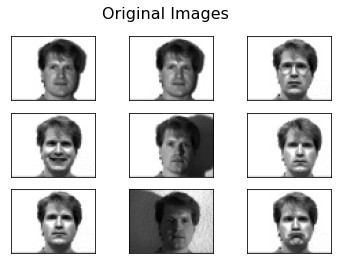

In [5]:
savePath = r"G:\Nit Calicut\SEM2\PRA\SPML\CODE\yaleImagesFinal";


imgs = []
flattened_images = []

for x in os.listdir(savePath):
    if "jpg" in x: 
        im = plt.imread(savePath + "\\" + x)
        imgs.append(im)
        flattened_images.append(im.flatten())

griddisplay(imgs,"Original Images") 

# Finding the mean face of the dataset

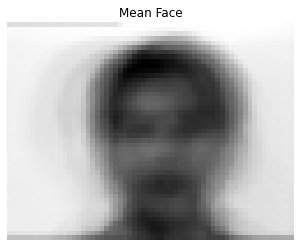

In [6]:
n_components = 1000;

n_samples = len(imgs);

[h,w] = imgs[0].shape

A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

# imgsData = imgsData.transpose()



mean= np.mean(A,1)

MeanFace = mean.reshape(h,w)
plt.figure()
plt.imshow(MeanFace,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Mean Face')
plt.show()

# Subtracing mean from all images and thus centering the data

Zero mean faces


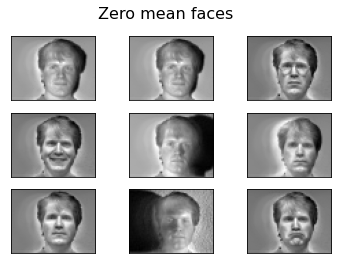

In [7]:
zero_mean =[]
column =0
Zero_mean_matrix= np.ones((h*w,n_samples))

for values in flattened_images:
    #zm = values-mean
    zm= A[:,column] - mean
    #print("z",zm.shape)
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] = zm
    zm_images = zm.resize(h,w)
    zero_mean.append(zm)
    column = column +1
    
print('Zero mean faces')
griddisplay(zero_mean,'Zero mean faces')

# Finding the covariance matrix


In [9]:

from numpy import linalg as la
covarianceMtrx = (np.dot(Zero_mean_matrix,np.transpose(Zero_mean_matrix)))/(h*w)
print(covarianceMtrx.shape)

(2914, 2914)


# Finding eigen values and vectors

In [10]:
eigen_vecs, eigen_vals, _ = scipy.linalg.svd(covarianceMtrx)
eigen_vecs.shape

(2914, 2914)

# Lets see how eigen faces look like

Text(0.5, 0.98, 'First 10 Eigenfaces')

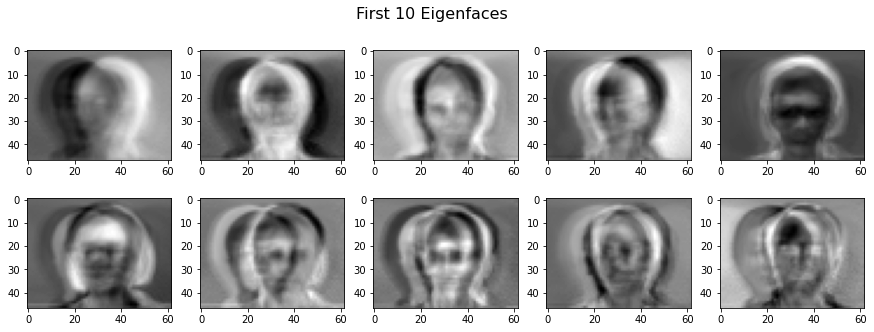

In [11]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(h,w)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)


# Reconstructing image from eigen faces using different eigen vectors

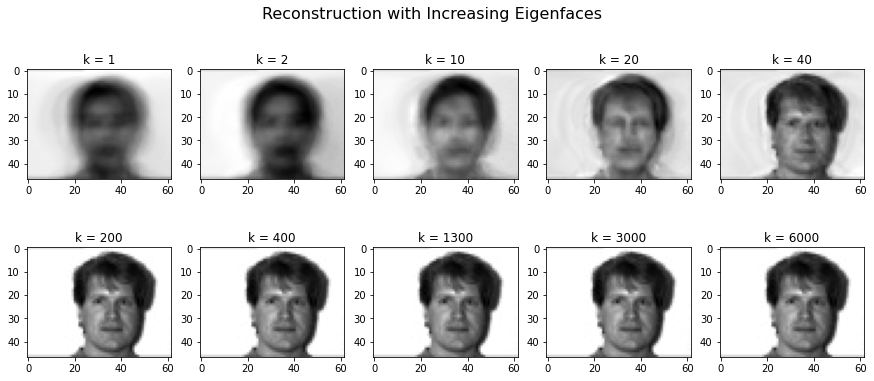

In [12]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,199,399,1299,2999,5999],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = Zero_mean_matrix[:,1].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(h,w)+mean.reshape(h,w),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);


# Now training PCA model with the entire dataset

In [22]:
trainingData = []
trainingData1 = []

for i in range(n_samples):

    weight = Zero_mean_matrix[:,i].dot(eigen_vecs[:,:n_components])
    projected_face = weight.dot(eigen_vecs[:,:n_components].T)
    trainingData.append(projected_face)
    trainingData1.append(weight)
    
    
print(len(trainingData1))
print( "OBSERVE - NUMBER OF FEATURES NOW REDUCED FROM 2914 TO 1000")
print(trainingData1[0].shape)


#  

166
OBSERVE - NUMBER OF FEATURES NOW REDUCED FROM 2914 TO 1000
(1000,)


# PCA testing

(1, 2914)


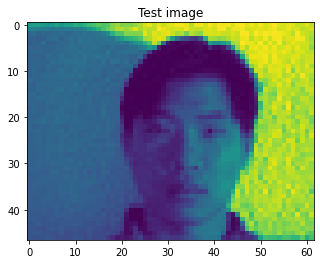

In [28]:
# PCA TESTING    

testImage = imgs[40]

plt.figure()
plt.title("Test image")
plt.imshow(testImage)

testImageData = testImage.flatten().reshape(h*w,1)
testImgCentered = testImageData - mean


weightTest = (testImgCentered.T).dot(eigen_vecs[:,:n_components]) 
projected_Testface = weightTest.dot(eigen_vecs[:,:n_components].T) 

print(projected_Testface.shape)

# Comparing test image PCA scores with the training dataset score

40
[2.2341061813691125e-12, 6320.631297584127, 6334.709148808651, 6084.898766618884, 6039.259640055229]


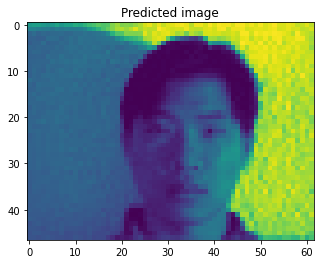

In [29]:
euclideanDistanceArr = []

# for i in range(n_samples):
#     diff =(projected_Testface - trainingData[i])
#     euclideanDistance = math.sqrt(diff.dot(diff.T)) 
#     euclideanDistanceArr.append(euclideanDistance)
    
euclideanDistanceArr1 = []    
    
for i in range(n_samples):
    diff1 =(weightTest - trainingData1[i])
    euclideanDistance1 = math.sqrt(diff1.dot(diff1.T)) 
    euclideanDistanceArr1.append(euclideanDistance1)    
    
best_match = np.argmin(euclideanDistanceArr1)   
print(best_match)


print(euclideanDistanceArr1[best_match:best_match+5])

plt.figure()
plt.title("Predicted image")
plt.imshow(imgs[best_match])    